In [8]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
from targetexplore.targets import Targets

In [9]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

# Number of random pointings
n = 10

# Random RA between 0 and 360 degrees
ra = np.random.uniform(0, 360, n)

# Random Dec between -90 and +90 degrees
dec = np.arcsin(np.random.uniform(-1, 1, n)) * (180 / np.pi)

# Create the SkyCoord object
coords = SkyCoord(ra=ra * u.degree, dec=dec * u.degree, frame='icrs')

print(coords)

<SkyCoord (ICRS): (ra, dec) in deg
    [( 53.51941554,  47.45016243), (299.73239513, -48.17329883),
     (  3.30696501,  -9.17554917), ( 53.47221816,  48.93698868),
     ( 98.07201137,  50.22560129), (217.42174937,  -7.07235079),
     (312.18225656,  20.27828638), (107.93505656, -16.87071519),
     (166.00578464, -11.40212719), ( 31.1861753 , -10.1212735 )]>


In [10]:
tgts = Targets(coords, telescope="MeerKAT", band="5b")

INFO: Query finished. [astroquery.utils.tap.core]


/datax/users/obs/osea/seticore/python/targetexplore/_utils/conversion.py:8: RuntimeWarning: divide by zero encountered in divide
  return c / (D * theta_FOV / 1.22) / 1e9


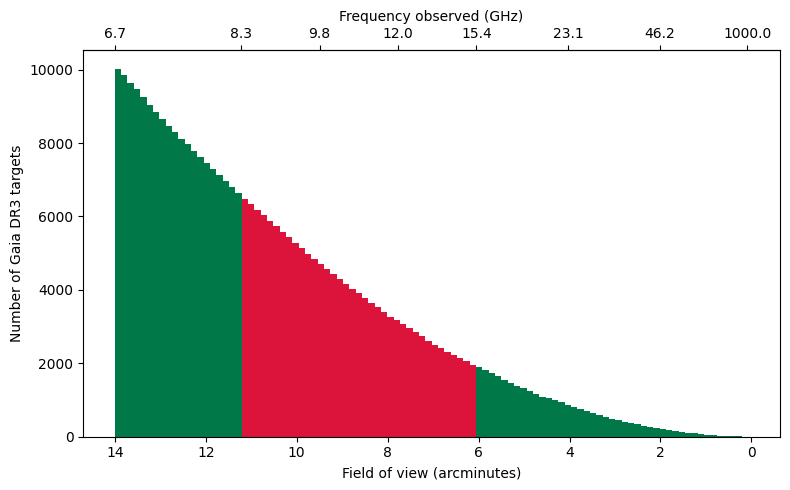

In [11]:
tgts.hist_separation()

/datax/users/obs/osea/seticore/python/targetexplore/_utils/distance.py:19: RuntimeWarning: invalid value encountered in divide
  norm_posterior = posterior / simpson(posterior, r)
/datax/users/obs/osea/seticore/python/targetexplore/_utils/distance.py:19: RuntimeWarning: divide by zero encountered in divide
  norm_posterior = posterior / simpson(posterior, r)


<Axes: xlabel='distance (pc)', ylabel='number of targets'>

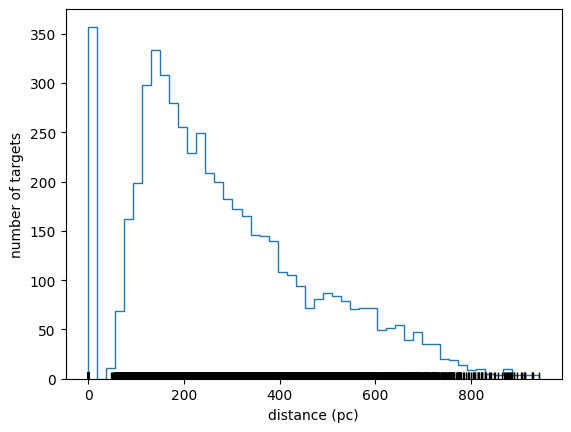

In [12]:
tgts.hist_distance(bins=50, mask_parallax=True)

In [ ]:
tgts.hr(mask_parallax=True)